In [1]:
%matplotlib inline  

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
sf_crime = pd.read_csv('data/train.csv') 
sf_locs = pd.read_csv('data/sf_locations_zip.csv') 

In [3]:
sf_crime['Location'] = sf_crime['Y'].astype(str).str.cat(sf_crime['X'].astype(str), sep=',')
sf_crime_locs = sf_crime.merge(sf_locs[['Location','ZipCode']], how='left', on='Location')

In [7]:
topn_zips = sf_crime_locs.ZipCode.value_counts()[:6]
topn_crimes = sf_crime_locs.Category.value_counts()[:15]

sf_crime_locs_topn = sf_crime_locs[sf_crime_locs['ZipCode'].isin(topn_zips.index.tolist())]
sf_crime_locs_topn = sf_crime_locs_topn[sf_crime_locs_topn['Category'].isin(topn_crimes.index.tolist())]

zip_count = sf_crime_locs_topn.groupby(['ZipCode']).size()
zip_cat_count = sf_crime_locs_topn.groupby(['ZipCode', 'Category']).size()

zip_cat_pct = zip_cat_count.div(zip_count, level='ZipCode') * 100
zip_cat_pct.unstack().T.head(2)

ZipCode       94102     94103     94108      94110      94112      94124
Category                                                                
ASSAULT   10.108226  8.291608  8.981963  11.543285  11.123689  13.089292
BURGLARY   2.297809  2.449723  4.722996   3.645610   3.040349   3.965191

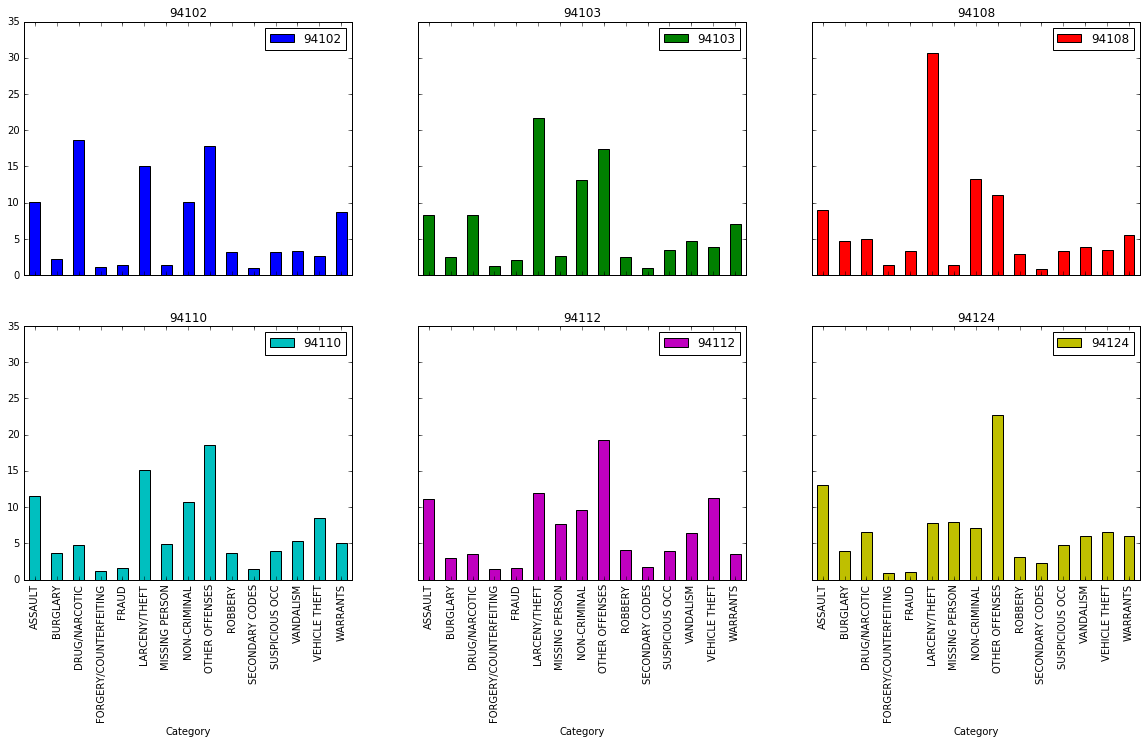

In [9]:
mpl.rcParams['figure.figsize'] = (20.0, 10.0)
zip_cat_pct.unstack().T.plot(kind='bar', subplots=True, layout=(2,3), sharex=True, sharey=True)
plt.show()

In [10]:
topn_crimes = sf_crime_locs.Category.value_counts()[:15]
sf_crime_locs_topn = sf_crime_locs[sf_crime_locs['Category'].isin(topn_crimes.index.tolist())]

pdd_count = sf_crime_locs_topn.groupby(['PdDistrict']).size()
pdd_cat_count = sf_crime_locs_topn.groupby(['PdDistrict', 'Category']).size()

pdd_cat_pct = pdd_cat_count.div(pdd_count, level='PdDistrict') * 100
pdd_cat_pct.unstack().T.head()

PdDistrict                BAYVIEW   CENTRAL  INGLESIDE    MISSION  NORTHERN  \
Category                                                                      
ASSAULT                 11.816961  8.717000  11.528433  10.319040  8.462540   
BURGLARY                 4.711439  5.645998   4.500317   3.466213  5.955724   
DRUG/NARCOTIC            5.392380  2.255151   3.206020   8.105106  4.589387   
FORGERY/COUNTERFEITING   0.927902  1.429303   1.319967   1.185639  1.314451   
FRAUD                    1.038195  2.928572   1.638813   1.823348  2.090709   

PdDistrict                  PARK  RICHMOND  SOUTHERN   TARAVAL  TENDERLOIN  
Category                                                                    
ASSAULT                 7.577554  7.461261  8.202659  8.827950   10.121393  
BURGLARY                6.225882  6.282186  3.259384  5.596044    1.961275  
DRUG/NARCOTIC           5.546813  2.327857  6.213095  2.474024   23.324414  
FORGERY/COUNTERFEITING  1.116692  1.442386  1.578859  1.772700    0.740751  
FRAUD                   2.099726  2.649423  2.316782  2.503111    1.489409

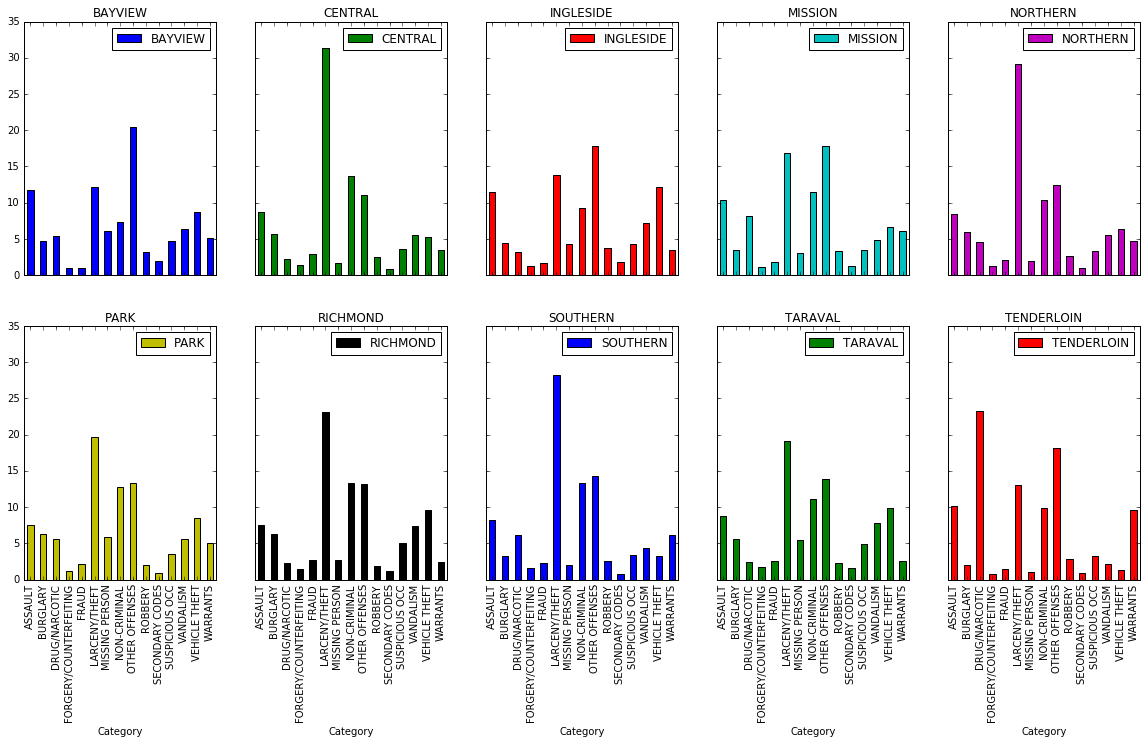

In [11]:
mpl.rcParams['figure.figsize'] = (20.0, 10.0)
pdd_cat_pct.unstack().T.plot(kind='bar', subplots=True, layout=(2,5), sharex=True, sharey=True)
plt.show()